# Exploring coherence in Grand Mesa

I want to explore one of the SnowEx Grand Mesa time series and look at how coherence changes over time. 

In [14]:
import os
import re
import numpy as np
import pandas as pd
import xarray as xr 
import rioxarray as rxa
import math
import matplotlib.pyplot as plt

Current working directory should be /Users/julo9057/Library/CloudStorage/OneDrive-UCB-O365/Documents/geog6655_coherence but check this and change if necessary 

In [2]:
os.getcwd()
os.chdir('/Users/julo9057/Library/CloudStorage/OneDrive-UCB-O365/Documents/geog6655_coherence/')

Now get the data that we want. I'll look at tjust the 2020 timeseries, which has 7 image pairs 

In [3]:
data_dir = './data/data/snowex_grmesa'
# scenes = os.listdir(data_dir)

In [4]:
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if re.search(pattern, name):
                result.append(os.path.join(root, name))
    return result

In [ ]:
cor_files = find('_20.*HH.*cor', data_dir)
cor_files

We have the filenames for the coherence files of all HH polarizations in 2020. For simplicity, I will just use the HH polarizations. 

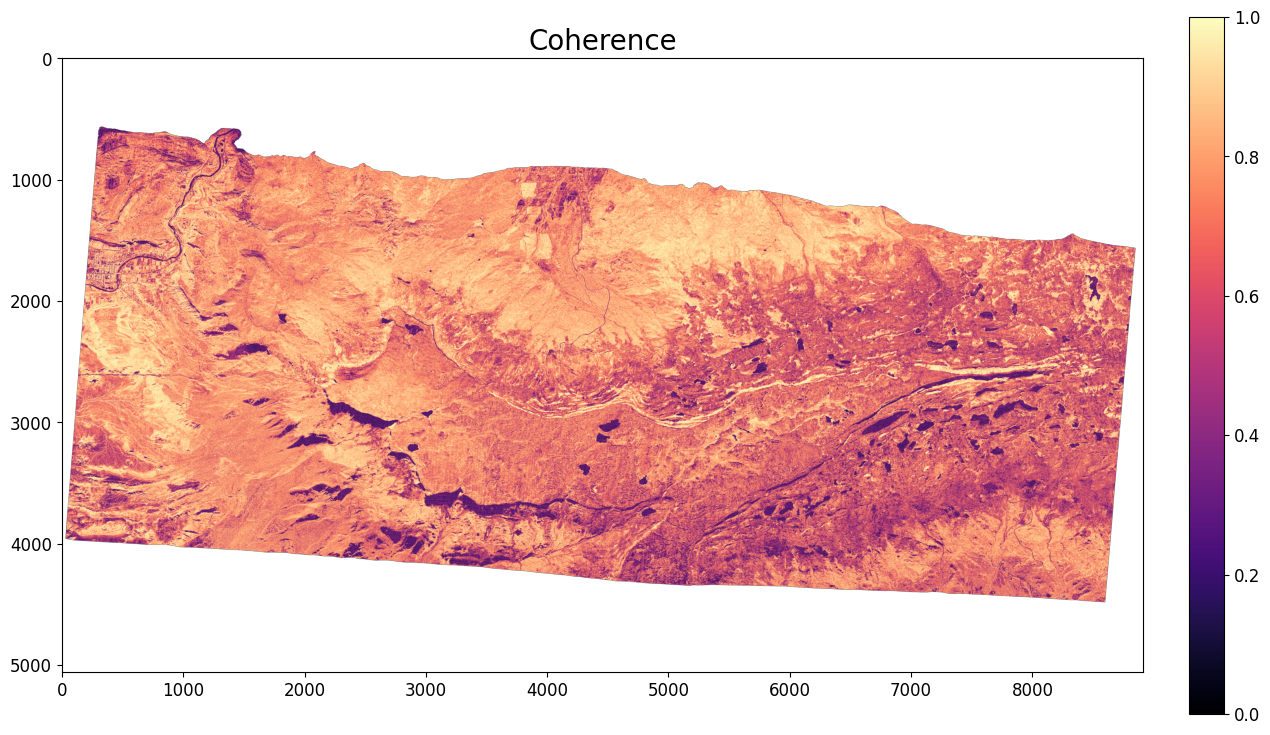

In [ ]:
# coherence
cor_rast  = rxa.open_rasterio(cor_files[0])
cor = cor_rast[0].values

def plot_coherence_list(tifs) : 
    

# plot coherence
plt.rcParams.update({'font.size': 12}) # increase plot font size for larger plot
fig, ax = plt.subplots(figsize=(15, 15))

ax.set_title("Coherence", fontsize= 20) #title and font size
img = ax.imshow(cor, cmap = 'magma', vmin = 0, vmax = 1)

# add legend
colorbar = fig.colorbar(img, ax=ax, fraction=0.03, pad=0.04) # add color bar
plt.show()

In [18]:
def plot_tifs_grid(tif_inputs, is_file=True):
    """
    Plots a list of .tif files or arrays in a grid (3 columns), with a shared colorbar.

    Parameters:
    - tif_inputs: list of file paths (if is_file=True) or list of 2D numpy arrays (if is_file=False)
    - is_file: boolean, set to True if tif_inputs is a list of .tif file paths, False if they are already arrays
    """
    
    # Load data arrays if file paths are provided
    if is_file:
        arrays = [rxa.open_rasterio(fp)[0].values for fp in tif_inputs]
        titles = [f"Image pair {i+1}" for i in range(len(tif_inputs))]  # use file name as title
    else:
        arrays = tif_inputs
        titles = [f"Image pair {i+1}" for i in range(len(arrays))]

    n_images = len(arrays)
    n_cols = 3
    n_rows = math.ceil(n_images / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), constrained_layout=True)
    axes = axes.flatten()  # flatten in case it's 2D

    # vmin/vmax for coherence
    vmin, vmax = 0, 1

    # Plot each image
    imgs = []
    for i, (arr, title) in enumerate(zip(arrays, titles)):
        img = axes[i].imshow(arr, cmap='magma', vmin=vmin, vmax=vmax)
        axes[i].set_title(title, fontsize=14)
        axes[i].axis('off')
        imgs.append(img)

    # Turn off unused axes
    for j in range(n_images, len(axes)):
        axes[j].axis('off')

    # Add one shared colorbar
    cbar = fig.colorbar(imgs[0], ax=axes[:n_images], orientation='vertical', fraction=0.02, pad=0.02)
    cbar.set_label('Coherence', fontsize=12)

    plt.show()

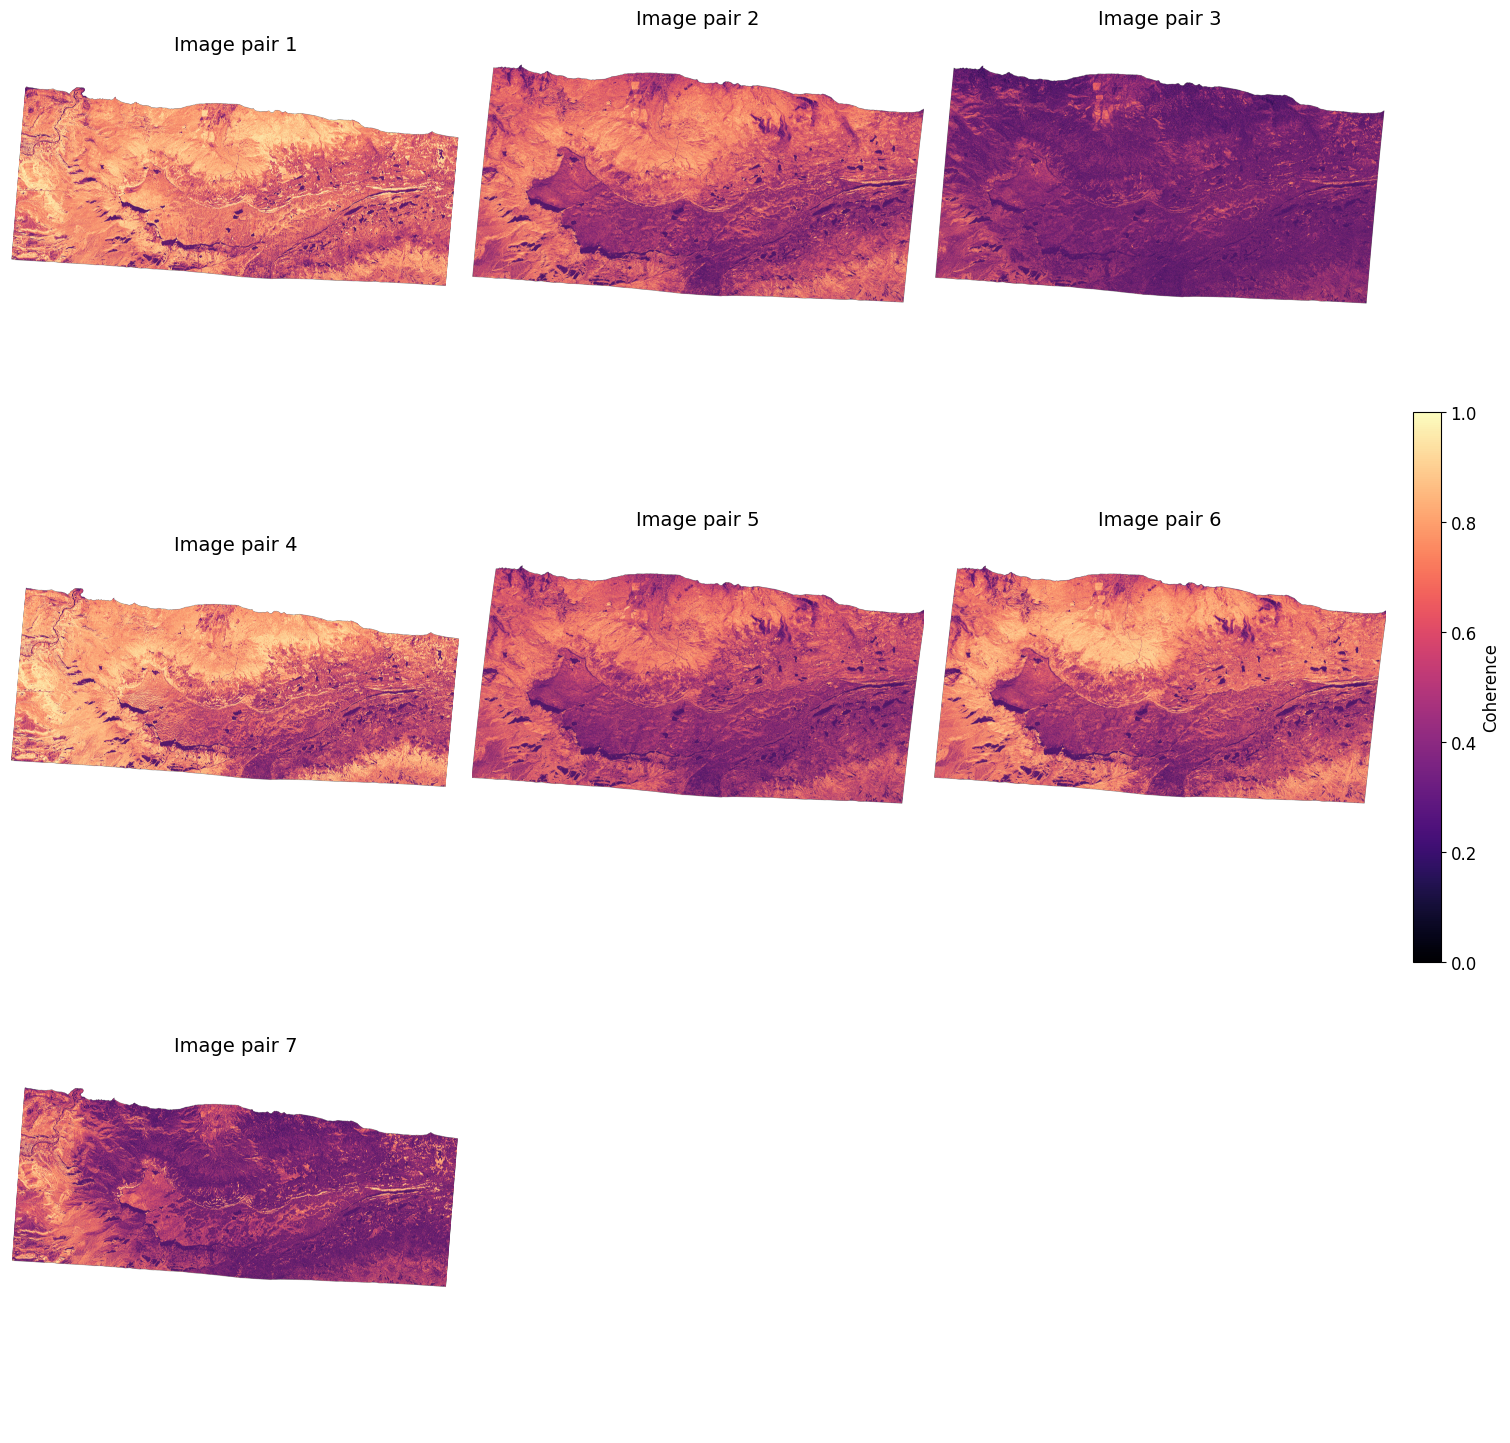

In [19]:
plot_tifs_grid(cor_files, True)